# Template Matching Berk Mehmet Gürlek

## Simple Brute Force Template Matching Algorithm

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imutils

# Template Matching for image that is not rotated

Top left corner [150, 855]
Top right corner [150, 969]
Bottom left corner [264, 855]
Bottom right corner [264, 969]


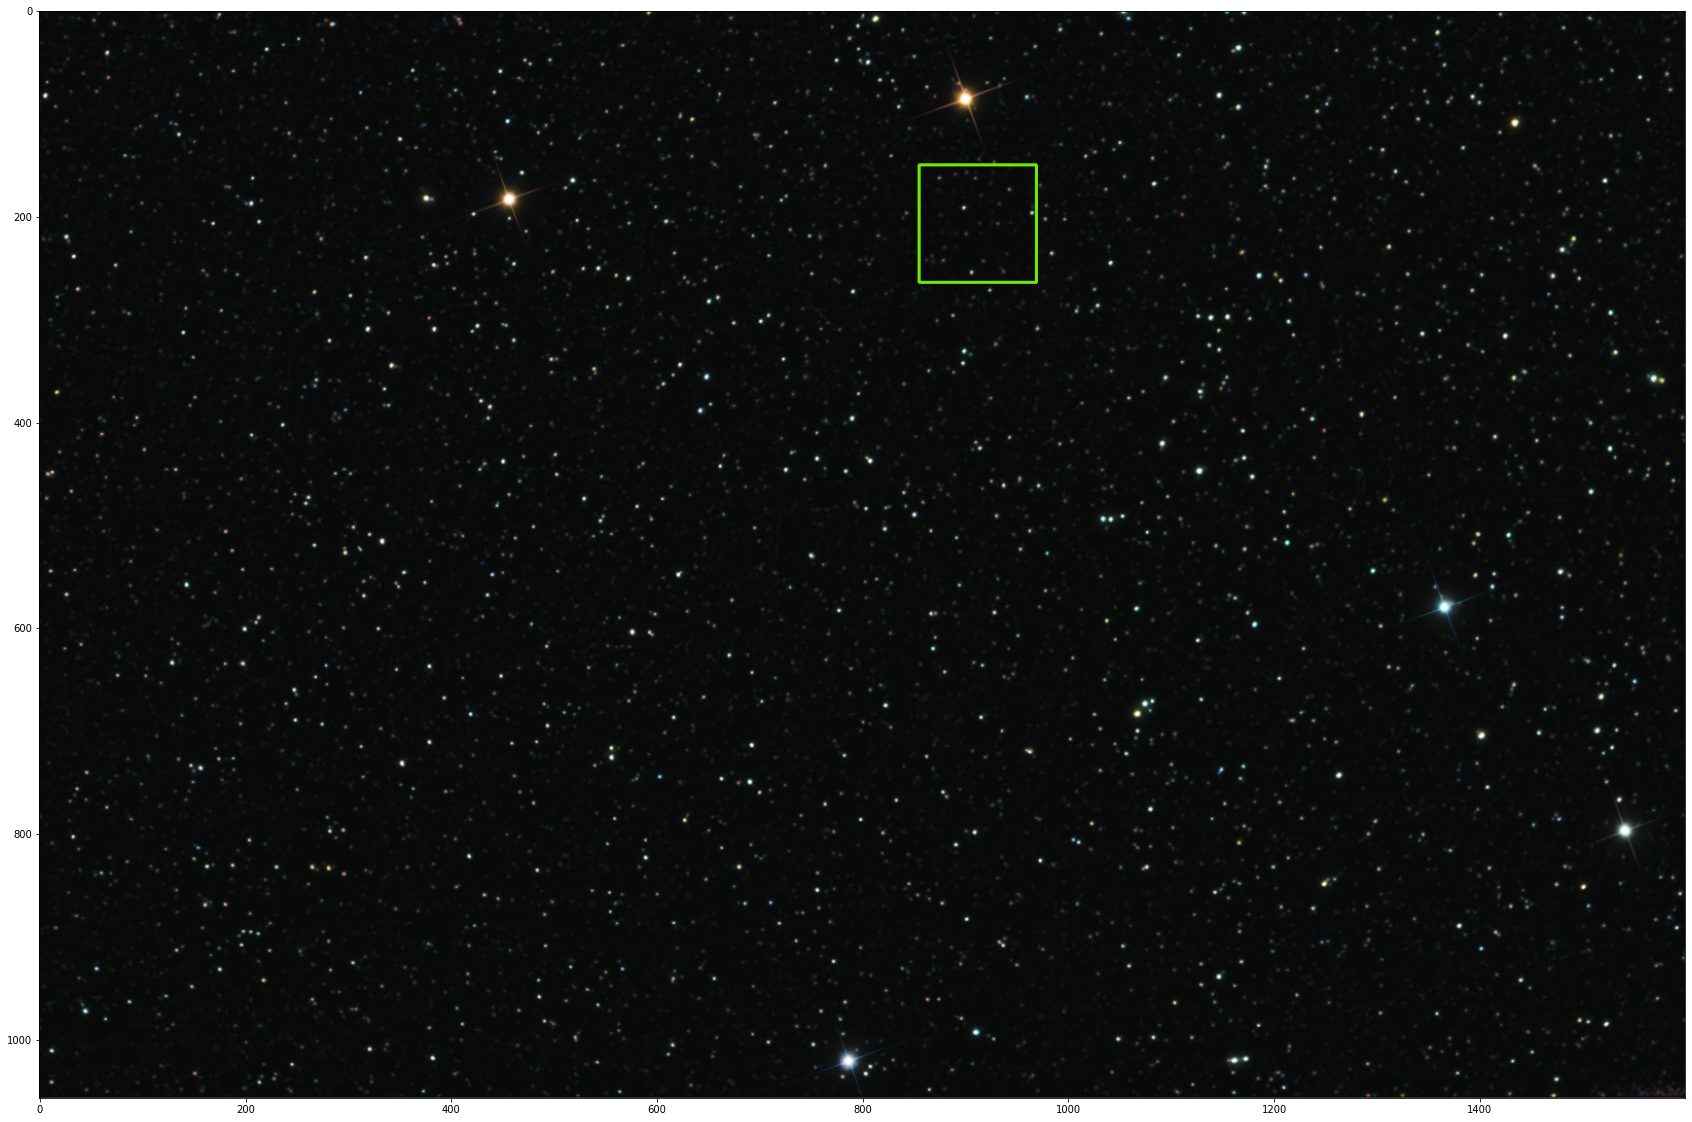

In [2]:
starMap = cv2.imread('StarMap.png') # original image
g_starMap = cv2.cvtColor(starMap, cv2.COLOR_BGR2GRAY) # gray scale image
smallImage = cv2.imread('Small_area.png', 0) # area to look for
r_smallImage = cv2.imread('Small_area_rotated.png', 0)
si_w, si_h = smallImage.shape[::-1] # width and height of area
match = cv2.matchTemplate(g_starMap, smallImage, cv2.TM_CCOEFF_NORMED)
th = 0.9
part = np.where(match >= th) # top left coordinates of the small image
#print(part)
for pt in zip(*part[::-1]):
    #print(pt)
    cv2.rectangle(starMap, pt, (pt[0] + si_w, pt[1] + si_h), (110,233,0), 2)

print('Top left corner [' + str(part[0][0]) + ', ' + str(part[1][0]) + ']')
print('Top right corner [' + str(part[0][0]) + ', ' + str(part[1][0] + si_h) + ']')
print('Bottom left corner [' + str(part[0][0] + si_w) + ', ' + str(part[1][0]) + ']')
print('Bottom right corner [' + str(part[0][0] + si_w) + ', ' + str(part[1][0] + si_h) + ']')  
plt.figure(figsize=(40,20))
plt.imshow(starMap)


# Brute Force scaling and rotation for rotated template

Top left corner [589, 449]
Top right corner [589, 603]
Bottom left corner [743, 449]
Bottom right corner [743, 603]


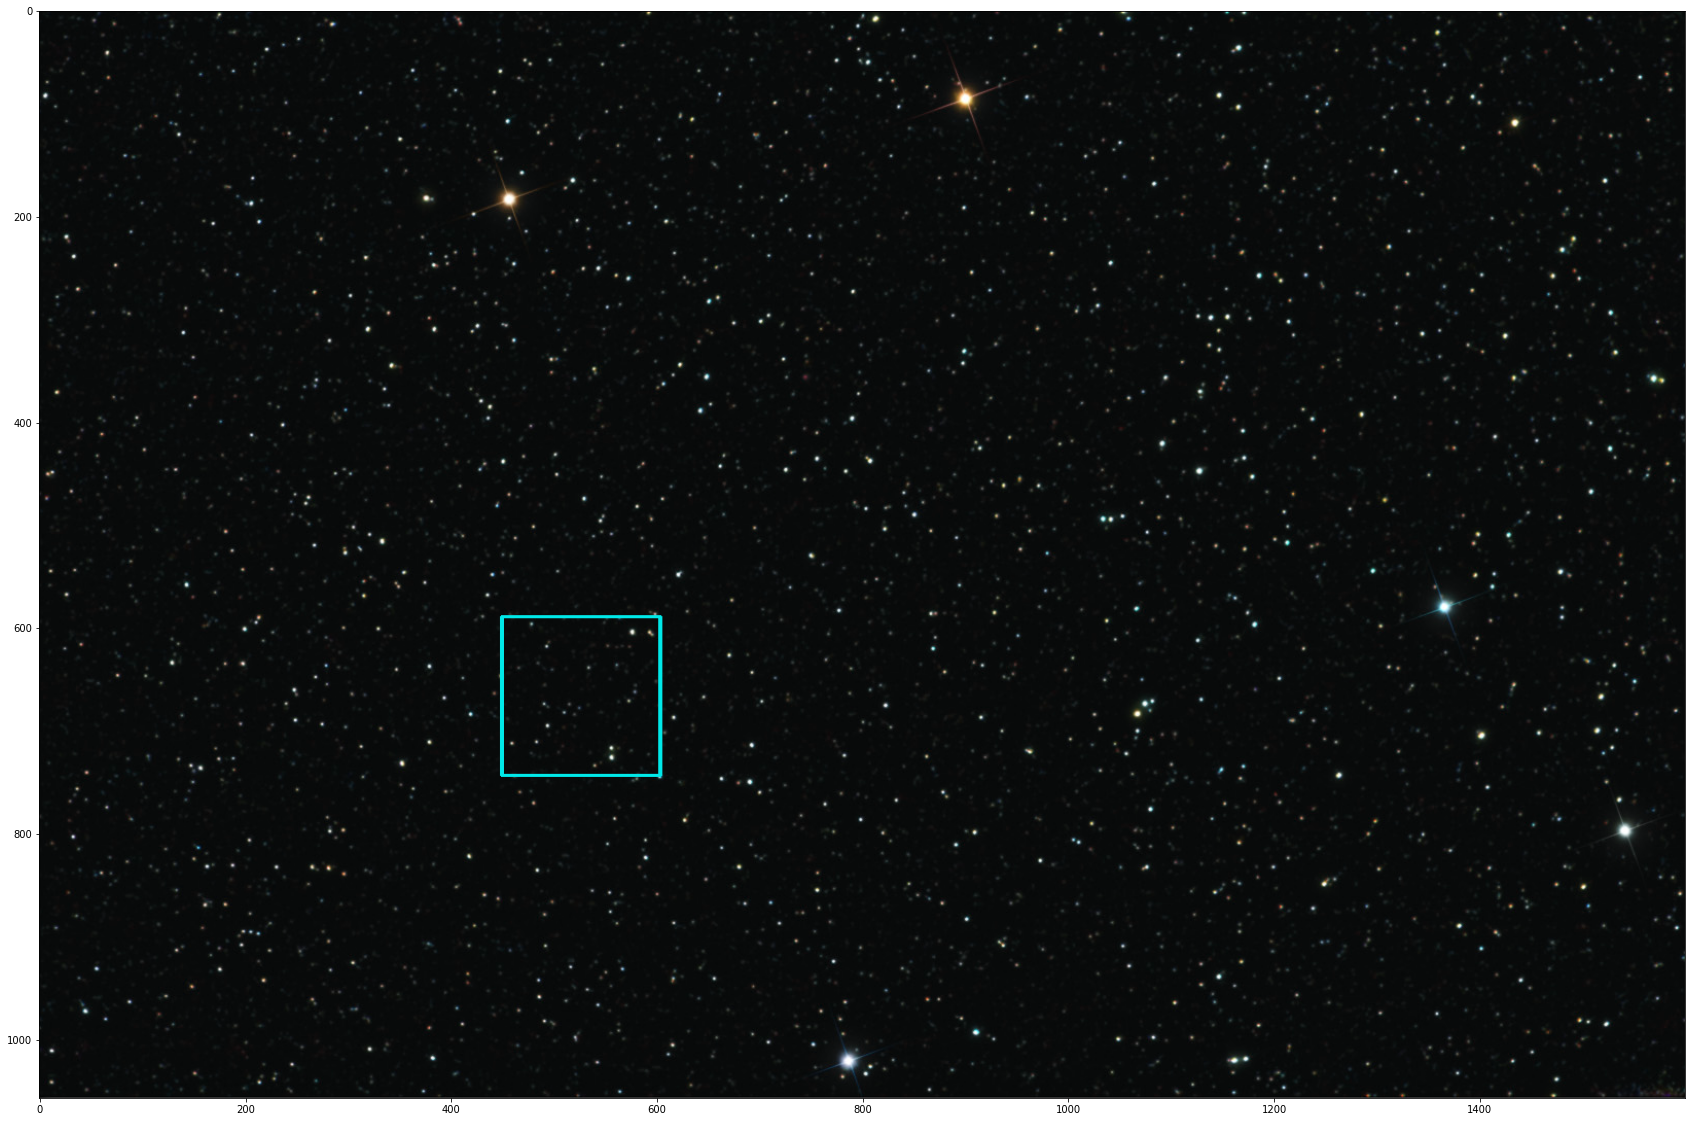

In [3]:
starMap2 = cv2.imread('StarMap.png') # original image
g_starMap2 = cv2.cvtColor(starMap, cv2.COLOR_BGR2GRAY) # gray scale image
# Reduce noise in images

g_starMap2 = cv2.bilateralFilter(g_starMap2, 11, 17, 17)
r_smallImage = cv2.bilateralFilter(r_smallImage, 11, 17, 17)

# Outer loop scales the image where inner loop rotates it
for scale in np.linspace(0.2, 1.0, 20)[::-1]:
    resized = imutils.resize(r_smallImage, width = int(r_smallImage.shape[1] * scale))
    for angle in np.arange(0, 360, 15):
        rotated = imutils.rotate(resized, angle)
        w, h = rotated.shape[::-1] # width and height of image
        matched = cv2.matchTemplate(g_starMap, rotated, cv2.TM_CCOEFF_NORMED)
        part = np.where(matched >= 0.7) # locations greater than threshold. Threshold is chosen as 0.7 since 0.8 gives empty because image has white space that increases error margin
        if part:
            if part[0].size > 0:
                print('Top left corner [' + str(part[0][0]) + ', ' + str(part[1][0]) + ']')
                print('Top right corner [' + str(part[0][0]) + ', ' + str(part[1][0] + w) + ']')
                print('Bottom left corner [' + str(part[0][0] + h) + ', ' + str(part[1][0]) + ']')
                print('Bottom right corner [' + str(part[0][0] + h) + ', ' + str(part[1][0] + w) + ']')  
            for pt in zip(*part[::-1]):
                cv2.rectangle(starMap2, pt, (pt[0] + w, pt[1] + h), (0,233,233), 2)



plt.figure(figsize=(40,20))
plt.imshow(starMap2)